# Data Processing and Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xarray as xr
import matplotlib.animation as animation 
import os
import iris
import matplotlib.dates as mdates
import iris.plot as iplt

In [3]:
dataframe_raw = pd.read_csv('/scratch/vp91/zxw900/AAPP_pytorch/CalCOFI_bottle.csv')
dataframe_raw.head()

/jobfs/92362465.gadi-pbs/ipykernel_160062/1455393563.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe_raw = pd.read_csv('/scratch/vp91/zxw900/AAPP_pytorch/CalCOFI_bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataframe_raw.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [6]:
calcofi_subset = dataframe_raw.loc[:,'Depthm':'O2Satq']

In [7]:
#let's get the column names
input_cols = list(calcofi_subset.columns.values)
print(input_cols)

['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq']


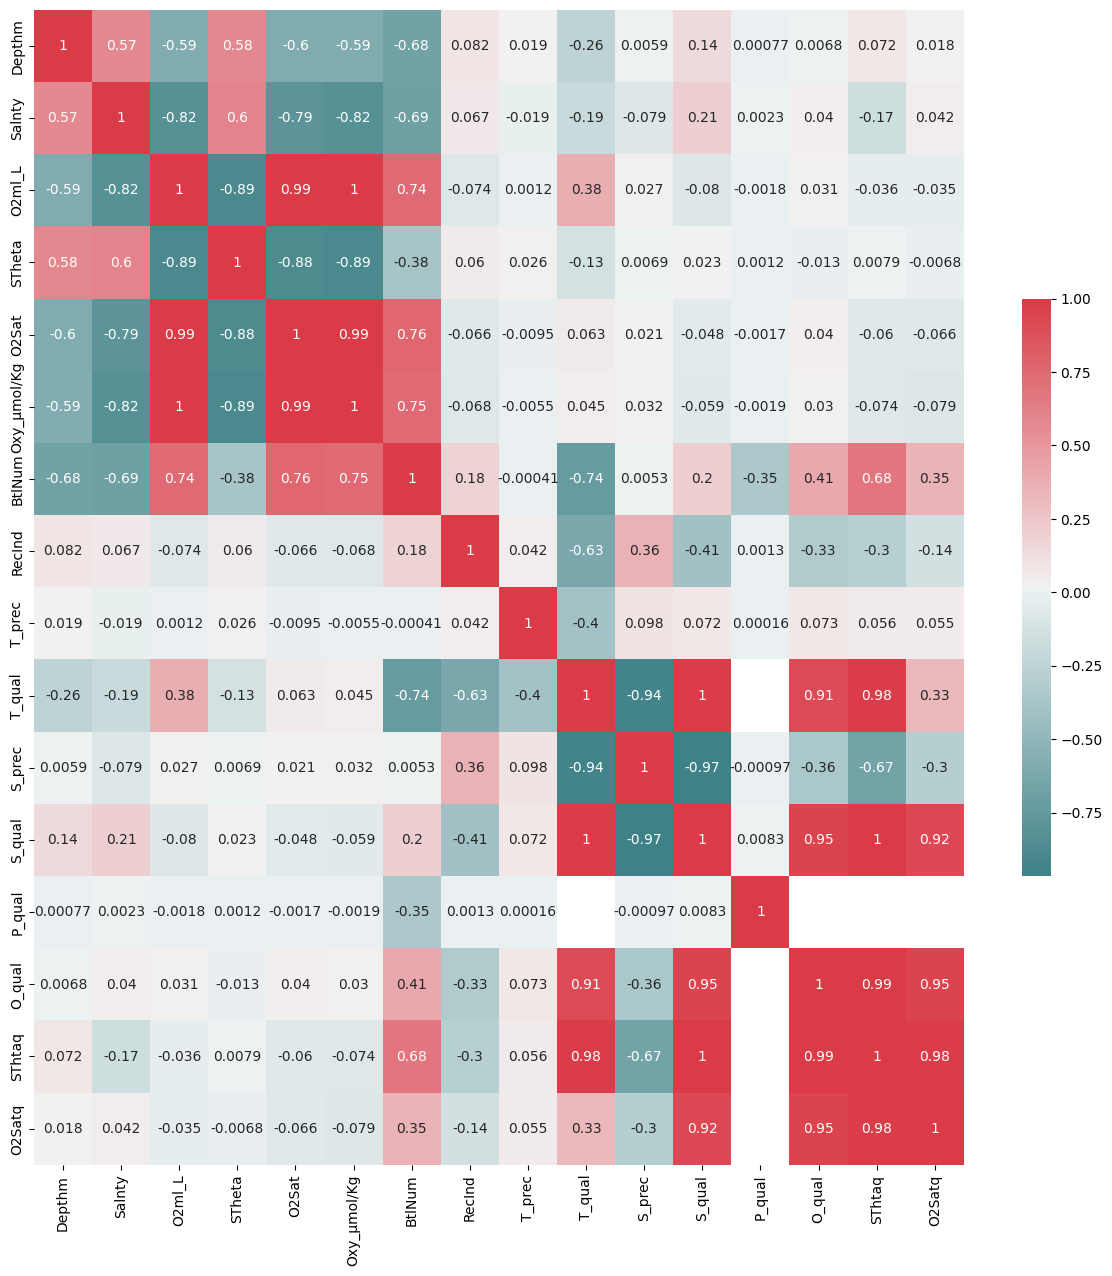

In [8]:
# Compute the correlation matrix
corr = calcofi_subset.drop(['T_degC'], axis=1).corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, cbar_kws={"shrink": .5});

In [9]:
corr_with_temp = calcofi_subset.corr()['T_degC'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_isi.drop('T_degC').plot.bar()
plt.show();

NameError: name 'corr_with_isi' is not defined

<Figure size 1000x1000 with 0 Axes>

In [10]:
dataframe = calcofi_subset.filter(items=['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg'])
dataframe.isnull().sum()

T_degC          10963
Depthm              0
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
dtype: int64

/jobfs/92362465.gadi-pbs/ipykernel_160062/1853381594.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.T_degC.dropna(), ax=ax[0])
/jobfs/92362465.gadi-pbs/ipykernel_160062/1853381594.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.T_degC.fillna(dataframe.T_degC.mean()),

Text(0.5, 1.0, 'Fillna with mean')

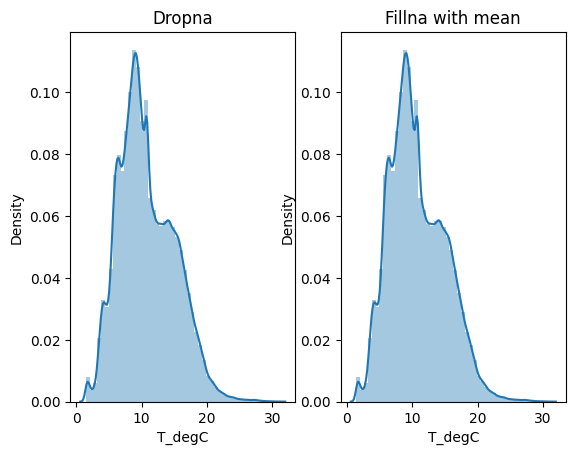

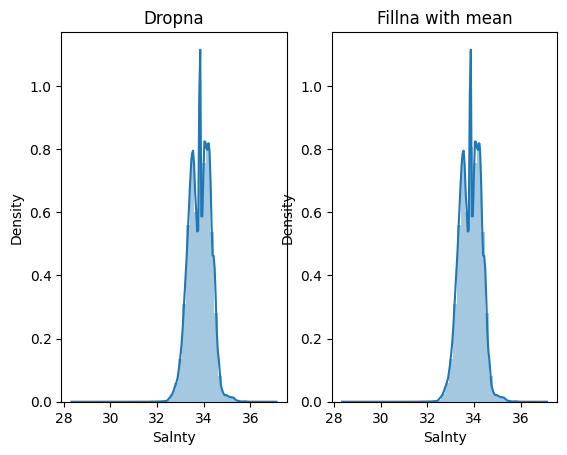

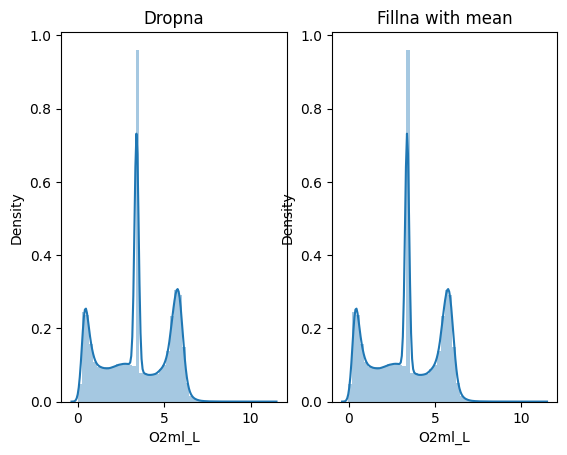

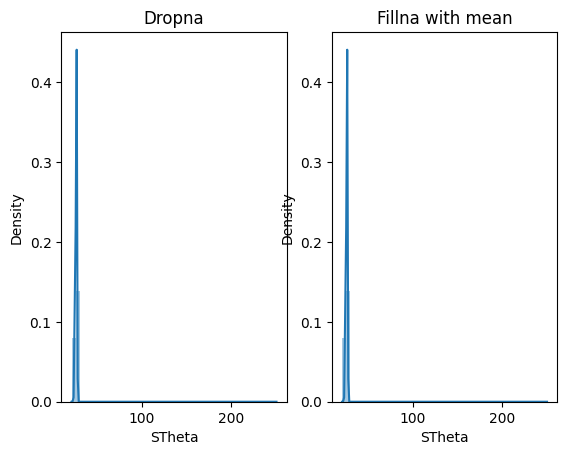

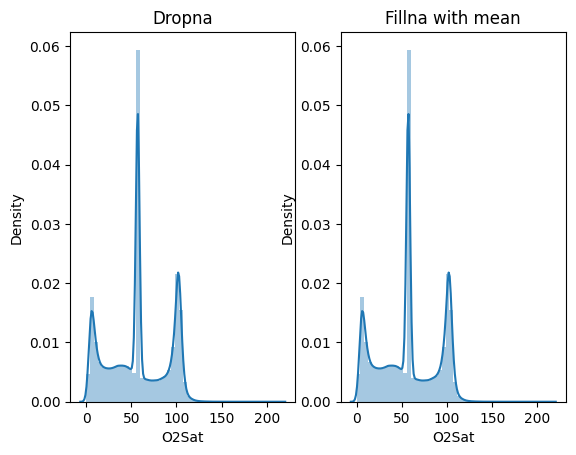

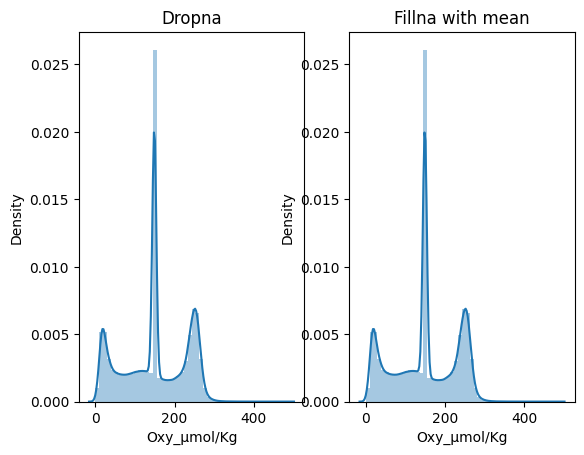

In [18]:
# Let's compare for each variable options fillna() vs mean()
fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.T_degC.fillna(dataframe.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.Salnty.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.Salnty.fillna(dataframe.Salnty.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.O2ml_L.fillna(dataframe.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.STheta.fillna(dataframe.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.O2Sat.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.O2Sat.fillna(dataframe.O2Sat.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe['Oxy_µmol/Kg'].dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe['Oxy_µmol/Kg'].fillna(dataframe['Oxy_µmol/Kg'].mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [12]:
def customize_dataset(data):
    dataframe = data.copy(deep=True)
    #select only 7 variables
    dataframe = dataframe.filter(items=['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg'])
    #fill na values
    dataframe = dataframe.groupby(dataframe.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    return dataframe

In [13]:
dataframe = customize_dataset(calcofi_subset)
dataframe.isnull().sum() 

T_degC         0
Depthm         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
dtype: int64

# Sea Surface Temperature Temporal Plots

In [3]:
### define data file of interest and open using xarray
data_path = "/scratch/vp91/zxw900/sea_surf_temp_data/*.nc"
f = xr.open_mfdataset(data_path)

In [3]:
f

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(12, 89, 180), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [15]:
##todo inspect each individual data entry

In [6]:
# Pick your favourite location in the ocean.
# We choose somewhere in the Bass Strait 
timeseries = f.sst.sel(lon=145.0,lat=-39.0,method='nearest')

In [7]:
x = range(1, len(timeseries.time)+1)
y = timeseries.values

Now, we can plot the the temporal temperature changes at the location we chose.

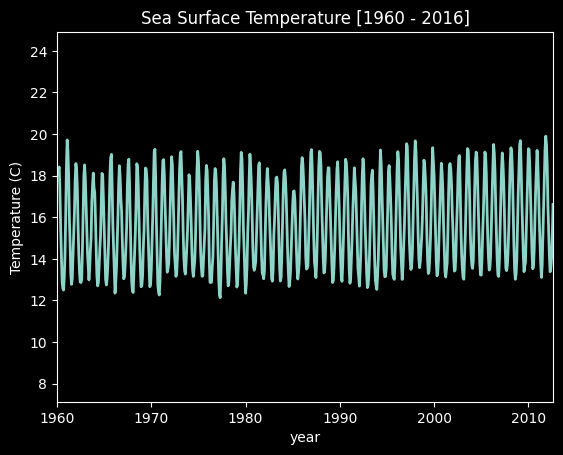

In [9]:
### set up figure
plt.style.use('dark_background')
fig = plt.figure() 
ax = plt.axes(xlim=(1, len(x)), ylim=(min(y)-5,max(y)+5)) 
line, = ax.plot([], [], lw=2) 

### define initialisation function 
def init(): 
    ### creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

### define lists to store x and y axis points 
xdata, ydata = [], [] 

### define animation function 
def animate(i): 

    ### x and y values to be plotted 
    x1 = x[i] 
    y1 = y[i] 

   ### appending new points to x1, y1 axiss points list 
    xdata.append(x1) 
    ydata.append(y1) 
    line.set_data(xdata, ydata) 
    return line, 

### setting a title for the plot 
plt.title('Sea Surface Temperature [1960 - 2016]') 
### defining the axis details 
plt.axis('on') 
plt.ylabel('Temperature (C)')
plt.xlabel('year')
plt.xticks([0,130,260,390, 520, 650], 
           ['1960', '1970', '1980','1990','2000','2010'])

### call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=len(x), interval=20, blit=True) 

### create output directory
outdir = './output'
if not os.path.exists(outdir):
    os.mkdir(outdir)

### save the animation as a GIF file 
animation_file = './output/timeseries.gif'

anim.save(animation_file,writer='imagemagick')




To play the gif go to /home/output/ and click the timeseries.gif

# Sea Surface Temperature Map Plots

In [ ]:
# Explain what IRIS is used for 

In [2]:
filenames=[]
for i in range(1960,2017):
    file='/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-'+str(i)+'.nc'
    filenames.append(file)

In [3]:
filenames

['/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1960.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1961.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1962.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1963.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1964.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1965.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1966.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1967.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1968.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1969.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1970.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1971.nc',
 '/scratch/vp91/zxw900/sea_surf_temp_data/NOAA_NCDC_ERSST_v3b_SST-1972.nc',
 '/scratch/v

In [4]:
cubes = iris.load(filenames, 'sea_surface_temperature')
cubes

[<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_surface_temperature / (degree_Celsius) (time: 12; latitude: 89; longitude: 180)>,
<iris 'Cube' of sea_s

In [5]:
Australia = cubes.extract(iris.Constraint(latitude=lambda v: -50 < v < -10, 
                                          longitude=lambda vv: 110 < vv < 155))

Globe = cubes.extract(iris.Constraint(latitude=lambda v: -90 <= v <= 90, 
                                      longitude=lambda vv: 0 <= vv <= 360))

/scratch/vp91/AAPP2023/Data-Analytics-ENV/lib/python3.10/site-packages/iris/coords.py:2249: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/scratch/vp91/AAPP2023/Data-Analytics-ENV/lib/python3.10/site-packages/iris/coords.py:2249: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


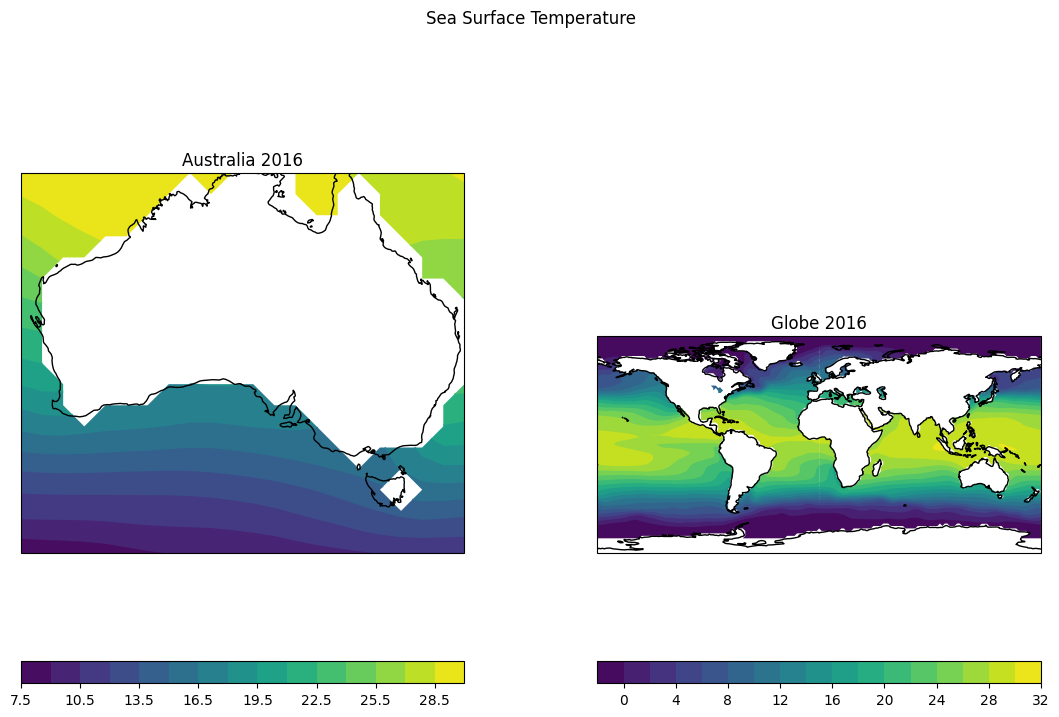

In [11]:
# Create a wider than normal figure to support our two plots
plt.figure(figsize=(12, 8), dpi=100)

# Manually adjust the spacings which are used when creating subplots
plt.subplots_adjust(hspace=0.05, wspace=0.3, top=0.95, bottom=0.05, left=0.075, right=0.925)

year = 2016
i = year-1960

cube_aus = Australia[i].collapsed('time', iris.analysis.MEAN)
cube_globe = Globe[i].collapsed('time', iris.analysis.MEAN)

# Plot for Australia
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
cf_aus = iplt.contourf(cube_aus, 20)
plt.gca().coastlines()
colorbar_aus = plt.colorbar(cf_aus, orientation='horizontal')
plt.title('Australia ' + str(year))

# Plot for Globe
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
cf_globe = iplt.contourf(cube_globe, 20)
plt.gca().coastlines()
colorbar_globe = plt.colorbar(cf_globe, orientation='horizontal')
plt.title('Globe ' + str(year))

# Overall title
plt.suptitle('Sea Surface Temperature', y=1)

plt.show()